In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../"))
import matplotlib.pyplot as plt

from scripts.cleaner import DataCleaner
from scripts.eda_stats import EDAAnalyzer
from scripts.visualizer import DataVisualizer
from scripts.loader import DataLoader
# --- CONFIG ---
FILE_PATH = '../data/MachineLearningRating_v3.txt'


In [3]:
# Cell 2: Loading Data
loader = DataLoader(FILE_PATH)
df = loader.load_data()

# Quick check
if df is not None:
    print(df.head(3))

🔄 Loading data from ../data/MachineLearningRating_v3.txt...
✅ Data loaded successfully! Shape: (1000100, 52)
  UnderwrittenCoverID PolicyID     TransactionMonth IsVATRegistered  \
0              145249    12827  2015-03-01 00:00:00            True   
1              145249    12827  2015-05-01 00:00:00            True   
2              145249    12827  2015-07-01 00:00:00            True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   

       AccountType  ...         ExcessSelected CoverCategory   CoverType  \
0  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
1  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   
2  Current account  ...  Mobility - Windscreen    Windscreen  Windscreen   

            

In [4]:
# Cell 3: Cleaning Data
if df is not None:
    cleaner = DataCleaner(df)
    
    # Define columns to clean
    date_cols = ['TransactionMonth', 'VehicleIntroDate']
    num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured']
    cat_cols = ['Gender', 'MaritalStatus', 'Citizenship', 'Bank']

    # Apply cleaning
    cleaner.convert_to_datetime(date_cols)
    cleaner.convert_to_numeric(num_cols)
    cleaner.impute_categorical(cat_cols)
    
    df = cleaner.get_cleaned_data()
    print("Data cleaning pipeline completed.")
    print(df.dtypes)

/Users/mac/Documents/kaim/week3/scripts/cleaner.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col], errors='coerce')


Data cleaning pipeline completed.
UnderwrittenCoverID                 object
PolicyID                            object
TransactionMonth            datetime64[ns]
IsVATRegistered                     object
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                         float64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                   float64
make                                object
Model               

In [7]:
# Cell 4: Statistical Analysis
if df is not None:
    analyzer = EDAAnalyzer(df)
    
    print("\n--- Summary Statistics ---")
    display(analyzer.get_summary_stats())
    
    print("\n--- Missing Values ---")
    print(analyzer.get_missing_values())
    
    loss_ratio = analyzer.calculate_overall_loss_ratio()
    print(f"\n📊 Overall Portfolio Loss Ratio: {loss_ratio:.2%}")


--- Summary Statistics ---


,count,mean,min,25%,50%,75%,max,std
TransactionMonth,1000098,2015-02-28 10:49:29.147423744,2013-10-01 00:00:00,2015-01-01 00:00:00,2015-04-01 00:00:00,2015-06-01 00:00:00,2015-08-01 00:00:00,NaN
PostalCode,1000098.0,3020.600887,1.0,827.0,2000.0,4180.0,9870.0,2649.854413
mmcode,999546.0,54877704.020474,4041200.0,60056925.0,60058415.0,60058418.0,65065350.0,13603805.343562
RegistrationYear,1000098.0,2010.225371,1987.0,2008.0,2011.0,2013.0,2015.0,3.261391
Cylinders,999546.0,4.046642,0.0,4.0,4.0,4.0,10.0,0.29402
cubiccapacity,999546.0,2466.743258,0.0,2237.0,2694.0,2694.0,12880.0,442.80064
kilowatts,999546.0,97.207919,0.0,75.0,111.0,111.0,309.0,19.393256
NumberOfDoors,999546.0,4.01925,0.0,4.0,4.0,4.0,6.0,0.468314
VehicleIntroDate,999546,2008-04-20 17:04:04.990425600,1977-10-01 00:00:00,2007-11-01 00:00:00,2010-10-01 00:00:00,2012-04-01 00:00:00,2014-09-01 00:00:00,NaN
CustomValueEstimate,1000100.0,49714.719311,0.0,0.0,0.0,0.0,26550000.0,281047.830941



--- Missing Values ---
NumberOfVehiclesInFleet     1000100
CrossBorder                  999402
Rebuilt                      641903
WrittenOff                   641903
Converted                    641903
NewVehicle                   153297
AccountType                   40234
mmcode                          554
VehicleType                     554
VehicleIntroDate                554
NumberOfDoors                   554
Model                           554
make                            554
Cylinders                       554
bodytype                        554
kilowatts                       554
cubiccapacity                   554
CapitalOutstanding                4
PostalCode                        2
Province                          2
Country                           2
Language                          2
Title                             2
LegalType                         2
TransactionMonth                  2
MainCrestaZone                    2
TrackingDevice                    2
SubC

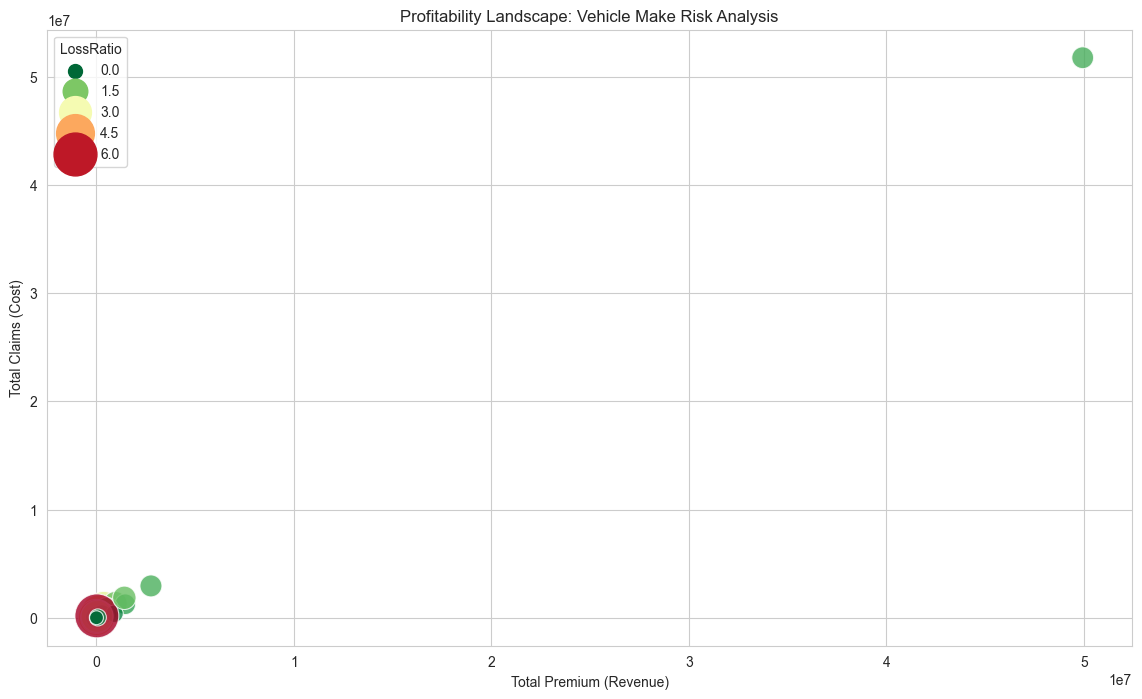

NameError: name 'plt' is not defined

In [8]:
# --- Visualization Cell ---
if df is not None:
    viz = DataVisualizer(df)
    
    # 1. The Profitability Landscape (Figure 1 in Report)
    viz.plot_profitability_landscape()
    plt.savefig('images/profitability_landscape.png') # Save it immediately after plotting
    
    # 2. Loss Ratio Over Time (Figure 2 in Report)
    viz.plot_creative_loss_ratio_over_time()
    plt.savefig('images/loss_ratio_timeline.png')
    
    # 3. Risk Heatmap (Figure 3 in Report)
    viz.plot_creative_risk_heatmap(x_col='Gender', y_col='VehicleType', val_col='TotalPremium')
    plt.savefig('images/risk_heatmap.png')

    print("✅ All images saved to images/ folder")

/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


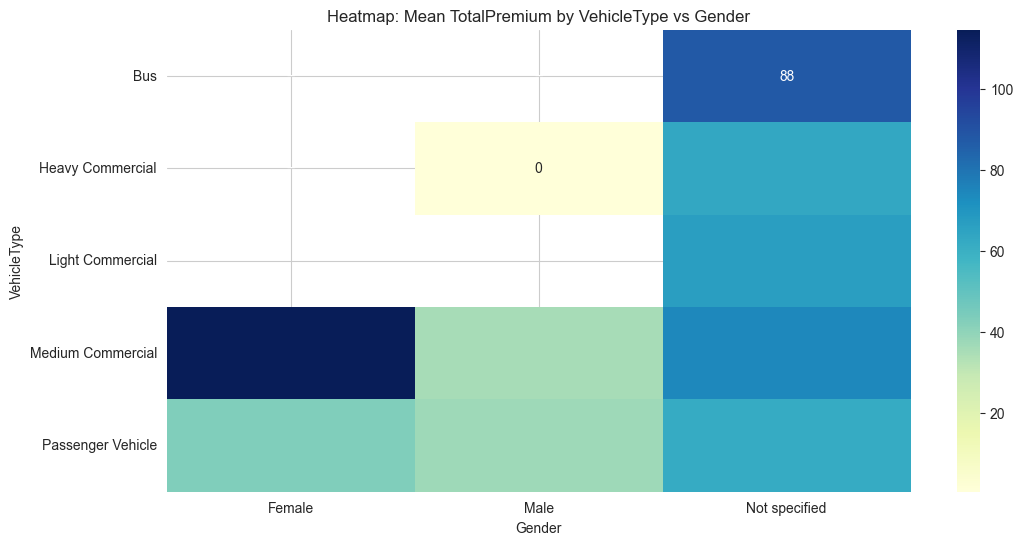

/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/Documents/kaim/week3/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


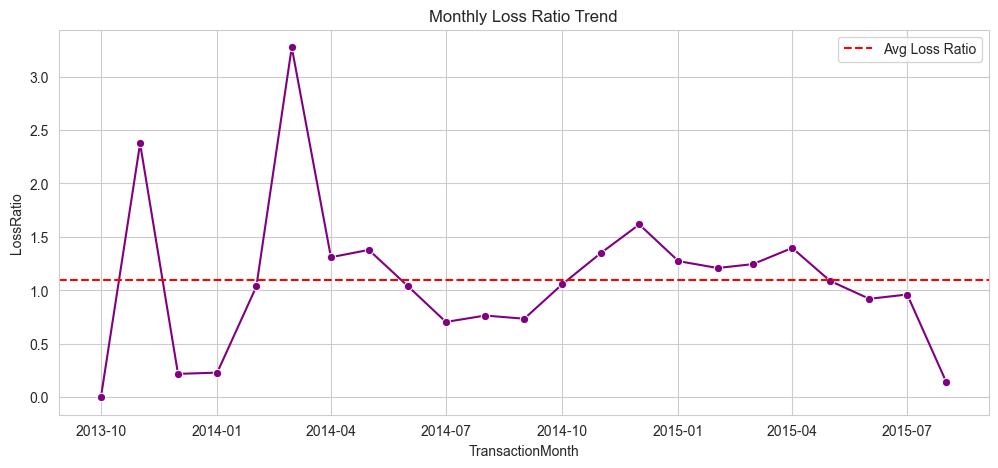

In [6]:
# Cell 6: Creative Plots (Insights)
if df is not None:
    # 1. Risk Heatmap
    viz.plot_creative_risk_heatmap(x_col='Gender', y_col='VehicleType', val_col='TotalPremium')
    
    # 2. Loss Ratio over time
    viz.plot_creative_loss_ratio_over_time()